In [1]:

import numpy as np
import torch
import cv2 as cv
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader
from torch.optim import RMSprop
from torch.optim.lr_scheduler import StepLR
from data_loaders import CAERSDataset
from utils import get_transform, accuracy, accuracy_julia
from model import model_generator
from tqdm import tqdm
import os.path as osp
from keras.models import load_model
import tensorflow as tf
import os


c:\Users\jdts\anaconda3\envs\emotionram\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

captura = cv.VideoCapture(0)
model_path = '.\models\\faces_19_95.01295733262594.pth'
model = torch.load(model_path)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") ## Se a maquina não tiver GPU o teste será rodado na CPU


model.to(device)

opt = RMSprop(model.parameters(), lr=3e-3)
lr_scheduler = StepLR(opt, 60, 0.4)





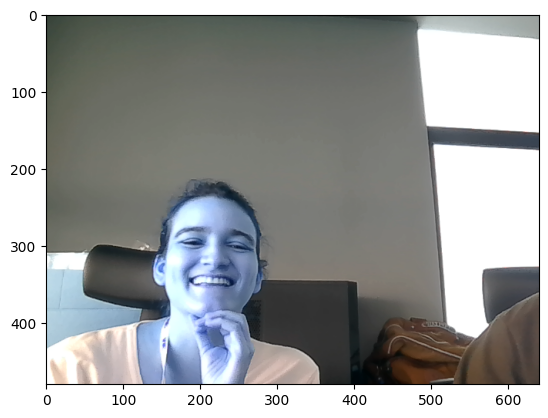

In [5]:
import matplotlib.pyplot as plt
ret, frame = captura.read()
gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 2)
plt.imshow(frame)

In [6]:
x,y,w,h = faces[0]
print(x, y, w, h)

149 239 141 141


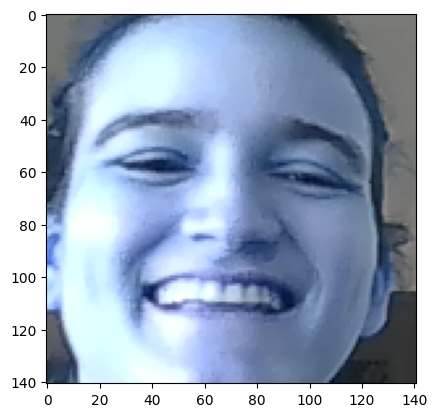

In [7]:
frame_ = frame[239:239+141, 149:149+141, :] # y+ h e x+w
plt.imshow(frame_)

In [8]:
type(frame_)
frame__ = torch.asarray(frame_)
print(type(frame__))

<class 'torch.Tensor'>


In [9]:
print(frame_.shape, frame__.shape, torch.unsqueeze(frame__, dim=0).shape)

(141, 141, 3) torch.Size([141, 141, 3]) torch.Size([1, 141, 141, 3])


In [10]:
preds = model(torch.unsqueeze(frame__, dim=0))

RuntimeError: Given groups=1, weight of size [32, 3, 3, 3], expected input[1, 141, 143, 5] to have 3 channels, but got 141 channels instead

In [17]:
#tf.disable_v2_behavior()
#(x,y),(x+w,y+h)

while(1):

    ret, frame = captura.read()
    #cv.imshow("Video", frame)
    # convert to grayscale of each frames
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        # read haacascade to detect faces in input image
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')

        # detects faces in the input image
    faces = face_cascade.detectMultiScale(gray, 1.1, 2)

    #face_tensor = tf.convert_to_tensor(faces)
    #face_tensor = np.load(faces.decode())
    

    print('Number of detected faces:', len(faces))\

        # loop over all the detected faces
    for (x,y,w,h) in faces:
        face_tensor = torch.from_numpy(faces)
        preds = model(face_tensor.to(device))
        preds = preds.to('cpu')
        ret, frame = captura.read()
        #face = tf.convert_to_tensor(faces, dtype=None, dtype_hint=None, name=None)
        #preds = model(frame.to(device))
        #preds = preds.to('cpu')
          
        # To draw a rectangle around the detected face  
        image= cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        cv.putText(image,preds, (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

        # Display an image in a window
        cv.imshow('Face Detection',frame)

        k = cv.waitKey(30) & 0xff
        if k == 27:
           break

captura.release()
cv.destroyAllWindows()

Number of detected faces: 1


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [3, 5]